In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def M_matrix(phi, Nt):
    M = np.eye(Nt)
    for i in range(Nt):
        ip = (i+1)%Nt
        p  = (i+1)//Nt
        M[ip, i] = (-1)**(p+1)*np.exp(-phi[i])
    return M

def test_M_matrix():
    Nt  = 5
    phi = np.arange(Nt)
    M = M_matrix(phi, Nt)
    assert np.all(np.diag(M) == np.ones(Nt))
    
    offdiag     = np.arange(Nt)
    sign = - np.ones(Nt)
    sign[-1] = 1
    offdiag = sign*np.exp(- offdiag)
    # print(offdiag)
    # print(np.diag(np.roll(M, -1, axis=1))) 
    assert np.all(np.isclose(offdiag, np.diag(np.roll(M, -1, axis=0))) )
    
   
test_M_matrix()
M_matrix(np.arange(5), 5)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.01831564],
       [-1.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.36787944,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.13533528,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.04978707,  1.        ]])

In [4]:
a = np.array([[0.5,2],[0,0.5]])
b = np.array([[-1.5,3],[-1,0.5]])

a, np.linalg.det(a)

c = np.array([a,a,a,a])
d = np.array([b,b,b,b])
(c @ d)[0],  a @ b

(array([[-2.75,  2.5 ],
        [-0.5 ,  0.25]]), array([[-2.75,  2.5 ],
        [-0.5 ,  0.25]]))

In [5]:
np.linalg.inv(c), np.linalg.inv(a)

(array([[[ 2., -8.],
         [ 0.,  2.]],
 
        [[ 2., -8.],
         [ 0.,  2.]],
 
        [[ 2., -8.],
         [ 0.,  2.]],
 
        [[ 2., -8.],
         [ 0.,  2.]]]), array([[ 2., -8.],
        [ 0.,  2.]]))

In [6]:
def calc_sample(phi):
    Nt = phi.size
    
    Mp = M_matrix(phi, Nt)
    Mn = M_matrix(-phi, Nt)
    MpMn = Mp @ Mn
    Minv = np.linalg.inv(Mp)
    
    Z_sample = np.linalg.det(MpMn)
    C_sample = np.linalg.inv(Mn)[:,0]*Z_sample
    return Z_sample, C_sample

def run(phi_samples):
    Nt = phi_samples.shape[-1]
    
    Z_data = np.zeros(Nsamples)
    C_data = np.zeros(phi_samples.shape)

    # should be vectorized
    for i, phi in enumerate(phi_samples):
        Z_data[i], C_data[i] = calc_sample(phi)
        
    Z = np.average(Z_data)
    C = 1/Z*np.average(C_data, axis = 0)
    return C
        
    
def sample_phi(Utilde, Nt, Nsamples):
    phi = np.random.normal(0,np.sqrt(Utilde), size=(Nsamples, Nt))
    return phi


    
    
Nt = 48
Nsamples = 10000
U_tot = 2
beta  = 2
delta = beta/Nt
Utilde = U_tot*delta

phi_samples = sample_phi(Utilde, Nt, Nsamples)
# C = run(phi_samples)
# plt.plot(C)

In [7]:
def M_matrices(phi_vecs):
    Nsamples, Nt = phi_vecs.shape
    M = np.zeros((Nsamples, Nt, Nt))
    
    indx = np.arange(Nt)
    sign = (-1)**(1+(indx+1)//Nt)
    
    M[:,indx,indx]        = 1
    M[:,(indx+1)%Nt,indx] = sign*np.exp(-phi_vecs)
    return M

def calc_C(phi_samples, K):
    Nsamples, Nt = phi_samples.shape
    
    Mp = M_matrices(phi_samples)
    Mn = M_matrices(-phi_samples)
    Minv = np.linalg.inv(Mp)
    MpMn = Mp @ Mn
    
    Z = np.linalg.det(MpMn)
    C = np.average((Minv[:,:,0].T*Z).T/np.average(Z), axis=0)
    
    # bootstrap
    choices = np.random.choice(np.arange(Nsamples), size = Nsamples*K)
    
    Z_s = Z[choices]
    C_s = (Minv[choices,:,0]*Z_s[:,None])
    Z_s_avg = np.average(Z_s.reshape(Nsamples, K), axis=0)
    C_s = np.average(C_s.reshape((Nsamples, K, Nt)), axis=0)
    
    C_s = (C_s / Z_s_avg[:,None])
    
    C_std = np.std(C_s, axis=0)
    
    return C, C_std

def C_exact(tau, U, beta):
    return 1/(2*np.cosh(U*beta/4))*np.cosh(U/2*(tau-beta/2))


In [8]:
phi_samp = sample_phi(Utilde, Nt = 48, Nsamples=10000)

C, C_std = calc_C(phi_samp, K = 50)

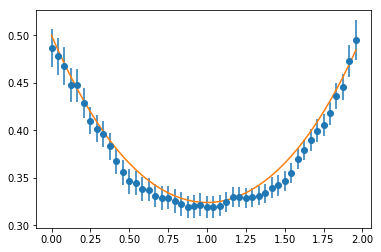

In [9]:
tau = 1*delta*np.arange(Nt)
plt.errorbar(tau, C, yerr=C_std, linestyle = ' ', marker='o')
plt.plot(tau, C_exact(tau, U_tot, beta))

In [ ]:
import tensorflow as tf

In [ ]:
tf.

In [ ]:
plt.imshow(np.linalg.inv(D))

In [ ]:
import scipy
scipy.version.version

Warning, no convergence within specified maxiter
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
lgmres 201


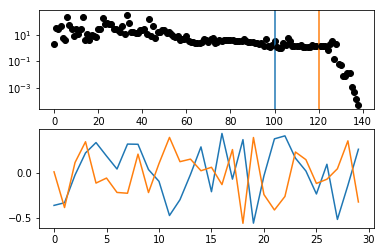

In [20]:
def err(A,x,b):
    return 

def BiCGStab(A, b, x=None, tol=1e-7, maxiter = 100, max_retry=5):
    fig,[ax1,ax2] = plt.subplots(2)
    if x is None:
        x = b
    r = b - A.dot(x)
    rtilde = r
    
    retry = 0
    rho = rtilde.conj().dot(r)
        
    while rho == 0:
        if retry >= max_retry:
            raise ValueError(f'rho == 0 after {retry} retries, method failed')
        print('rho == 0, recreating random x')
        x = np.random.random(b.shape)
        r = b - A.dot(x)
        rho = rtilde.conj().dot(r)
        retry += 1
    
    for i in range(maxiter):
        if i == 0:
            p = r
        else:
            if rhoprev == 0:
                print(f"ValueError('rho == 0'), {retry} retries")
                return x
            beta = alpha * rho / (omega * rhoprev)
            p    = r + beta * (p - omega * v)
            
        v = A.dot(p)
        alpha = rho / (rtilde.conj().dot(v))
        s = r - alpha * v
        
        ax1.semilogy(i, np.linalg.norm(s),'ko')
        
        n = 20
        j = i - 100
        if (j%n)==0 and j >= 0:
            ax1.axvline(i, c = f'C{j//n}')
            ax2.plot(A.dot(x) - b)
        if np.linalg.norm(s) < tol:
            print(f'convergence in {i} steps, with {retry} retries')
            x = x + alpha * p
            return x
        else:
            t = A.dot(s)
            omega = t.conj().dot(s) / (t.conj().dot(t))
            r = s - omega*t
            x = x + alpha*p + omega*s
            rhoprev = rho
            rho = rtilde.conj().dot(r)
            
    print('Warning, no convergence within specified maxiter')
    return x
   
N = 30
np.random.seed(5)
A = np.random.random((N,N))
b = np.random.random(N)
x_vecs = np.random.random((20,N))
x0 = x_vecs[4]


from temp import bicgstab
from scipy.sparse.linalg import lgmres

x1 = BiCGStab(A,b,np.zeros_like(b),maxiter=139)
x2,iter_ = bicgstab(A,b)

np.linalg.norm(A.dot(x1) - b), np.linalg.norm(A.dot(x2) - b)
print('lgmres', iter_)

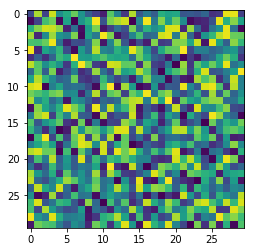

In [21]:
plt.imshow(A)

In [70]:
%timeit lgmres(A,b, atol=1e-5)

2.13 ms ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


2.37 ms ± 620 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Hubbard model, correlator

The correlator $C_{\uparrow\uparrow}(\tau)$ involves a column of the inverse of the fermion matrix, $(M^{-1})_{\tau,0}$. This can be written as $x = M^{-1}b^{\tau}$, where $(b^{\tau})_i = \delta_{i\tau}$. The problem to solve is then $Mx = b$, which we solve with the Bi-CGStab-algorithm. 

(1, 2000, 2000)
7.531517744064331
16.213722467422485
100000
120.217848777771
144.46513175964355
144.46513175964355


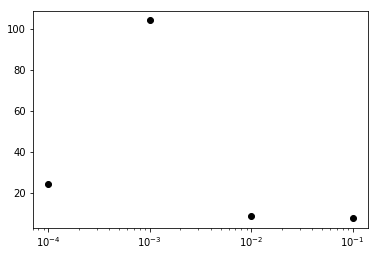

In [23]:
import time

from scipy.sparse.linalg import lgmres, bicgstab, qmr
np.random.seed(0)

Nt = 2000
Nsamples = 1
phi_samp = sample_phi(Utilde, Nt = Nt, Nsamples=Nsamples)

eye = np.eye(Nt)
Ms = M_matrices(phi_samp)
print(Ms.shape)

total = 0
tau = 1
btau = eye[tau]

for atol in 10.**(-np.arange(1,5)):
    x0 = np.random.random(Nt)

    start = time.time()
    i = 0
    x,info = qmr(Ms[i], btau, x0=x0, atol=atol, maxiter=100000)
    if info != 0:
        print(info)
    stop = time.time()
    total += stop-start
    print(total)

    plt.semilogx(atol, stop-start, 'ko')
        
print(total)

In [24]:
bicgstab(M, btau)

NameError: name 'M' is not defined

In [116]:
lgmres(M,btau, x0=x0, atol=1e-6)

(array([-0.65766027,  0.28441258,  0.3148206 ,  0.59430219,  0.38418284,
         0.6435049 ,  0.81978797,  0.70199297,  1.00314027,  1.35491234,
         1.76052758,  1.50057859,  0.77699717,  0.75447153,  1.02360863,
         0.85426372,  0.99445104,  0.97673328,  0.65891683,  0.78334006,
         0.75553588,  0.94973944,  0.96637554,  0.86575677,  1.12318146,
         1.21629143,  1.28424342,  1.53318582,  2.15491197,  3.24741705,
         3.38900098,  3.66192842,  1.91190549,  3.8551681 ,  3.72896283,
         3.34237881,  2.24401325,  1.92624728,  2.44053996,  2.42584623,
         2.06593029,  2.25601657,  1.80915492,  3.09603446,  1.86691191,
         1.2122107 ,  1.31341228,  1.08150972,  1.05299599,  1.31555226,
         1.25784591,  0.90829158,  0.9796246 ,  1.05426505,  1.04147786,
         0.87057237,  0.56179506,  0.62877548,  0.50994348,  0.44691292,
         0.71671249,  0.77158051,  0.76229891,  0.75120075,  0.66589327,
         1.18004037,  1.14545225,  1.37229098,  2.0

In [22]:

from scipy.sparse.linalg import bicgstab, cgs

b = BiCGStab(M, btau, x0, maxiter=1000)
bicgstab(M, btau, x0=x0)

NameError: name 'M' is not defined

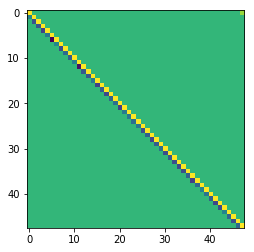

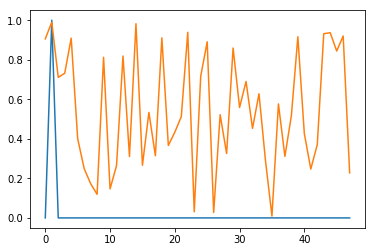

In [413]:
plt.imshow(M)
plt.figure()
plt.plot(btau)
plt.plot(x0)

In [400]:
a = np.linalg.solve(M, btau)

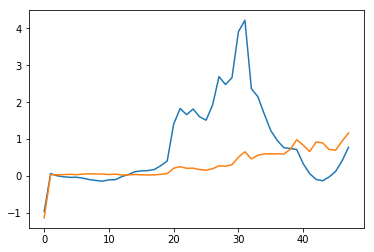

In [335]:
plt.plot(b)
plt.plot(a)

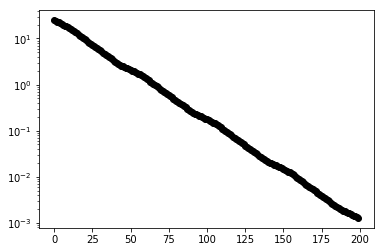

In [118]:
S = np.eye(D.shape[0])

Q = np.eye(D.shape[0]) - D
Dinv = S

Dinvnp = np.linalg.inv(D)


norm = []
ind = np.arange(200)
for i in ind:
    Dinv = S + Q.dot(Dinv)
    norm.append(np.linalg.norm(Dinv-Dinvnp))
    
plt.semilogy(ind, norm, 'ko')
# np.

In [101]:
np.isclose(Ainv, Ainvnp)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

1.3272983743957616

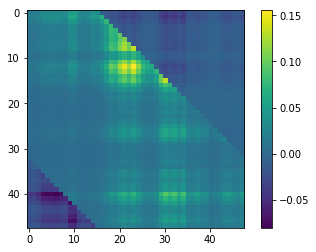

In [102]:
m = plt.imshow(Ainvnp - Ainv)
plt.colorbar(m)

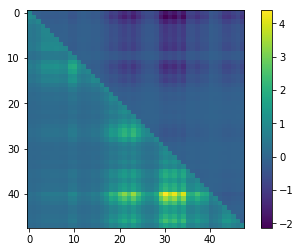

In [99]:
m = plt.imshow(Ainvnp)
plt.colorbar(m)

In [ ]:
for i in range(5)
    
    Nsamples, Nt = phi_samples.shape
    
    Mp = M_matrices(phi_samples)
    Mn = M_matrices(-phi_samples)
    Minv = np.linalg.inv(Mp)
    MpMn = Mp @ Mn